# imports

In [36]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
from scipy import stats


In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [37]:
def cramer_v(x,y):
  cm = pd.crosstab(x,y).values

  n = cm.sum()
  r, k = cm.shape

  chi2 = stats.chi2_contingency(cm)[0]
  chi2corr = max(0,chi2 - (k-1)*(r-1)/(n-1))
  kcorr = k- (k-1)**2/(n-1)
  rcorr = r- (r-1)**2/(n-1)
  return np.sqrt((chi2/n)/(min(kcorr-1,rcorr-1)))

# load data

In [4]:
df4 = pd.read_csv('data/df3.csv',low_memory=False)

In [5]:
df4.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,season
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,...,2015,7,31,31,2015-07,2008-09-01,84,2015-07-27,0,summer
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,...,2015,7,31,31,2015-07,2007-11-01,94,2010-03-22,279,summer
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,...,2015,7,31,31,2015-07,2006-12-01,105,2011-03-28,226,summer
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,...,2015,7,31,31,2015-07,2009-09-01,71,2015-07-27,0,summer
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,...,2015,7,31,31,2015-07,2015-04-01,4,2015-07-27,0,summer


In [6]:
df4.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month      int64
competition_open_since_year       int64
promo2                            int64
promo2_since_week                 int64
promo2_since_year                 int64
is_promo                          int64
year                              int64
month                             int64
day                               int64
week_of_year                      int64
year_week                        object
competition_since                object
competition_time_month            int64
promo_since                      object
promo_time_week                   int64


In [7]:
df4['date'] = pd.to_datetime(df4['date'])
df4['competition_since'] = pd.to_datetime(df4['competition_since'])
df4['promo_since'] = pd.to_datetime(df4['promo_since'])

# Exploratory data analysis

In [8]:
num_attribures = df4.select_dtypes(include=['int64','int32','float64'])
cat_attribures = df4.select_dtypes(exclude=['int64','int32','float64','datetime64[ns]'])

## Univariate analysis

### target variable

C:\Users\Lavin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

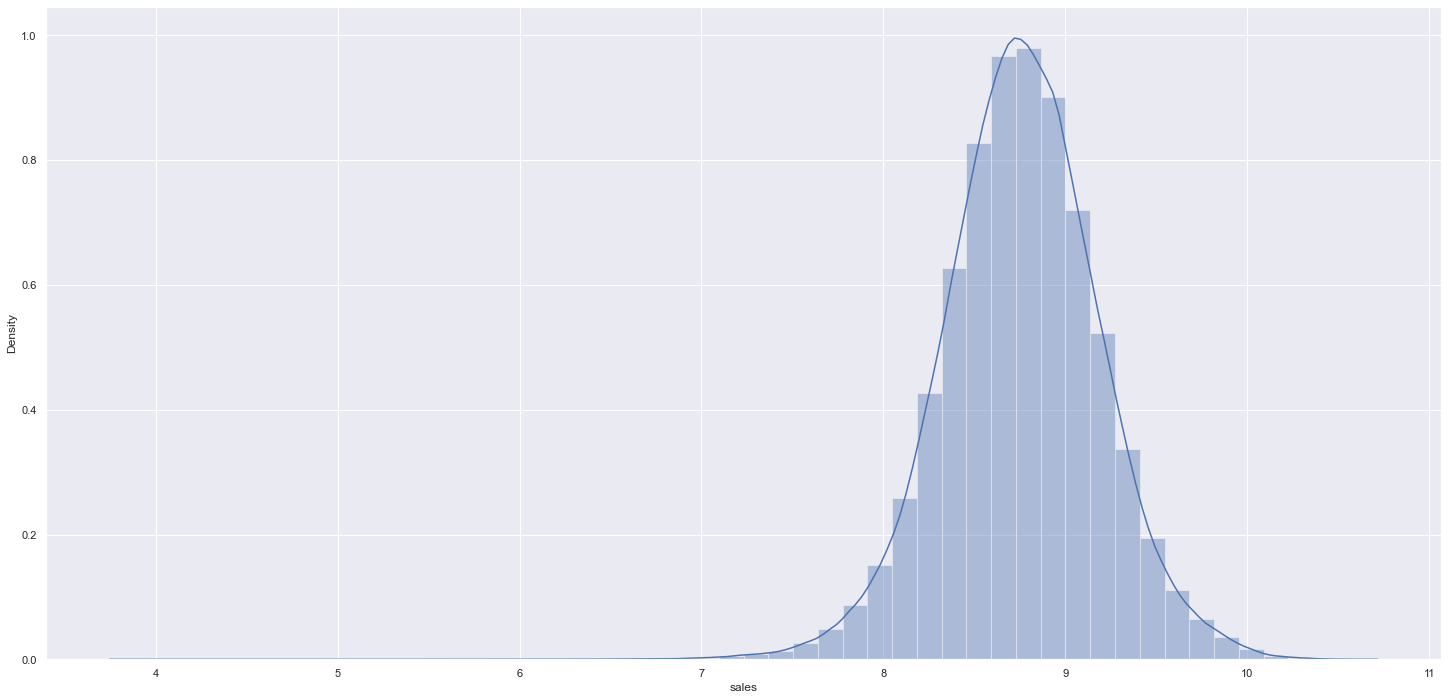

In [9]:
sns.distplot(np.log(df4['sales']))

### Numerical variables

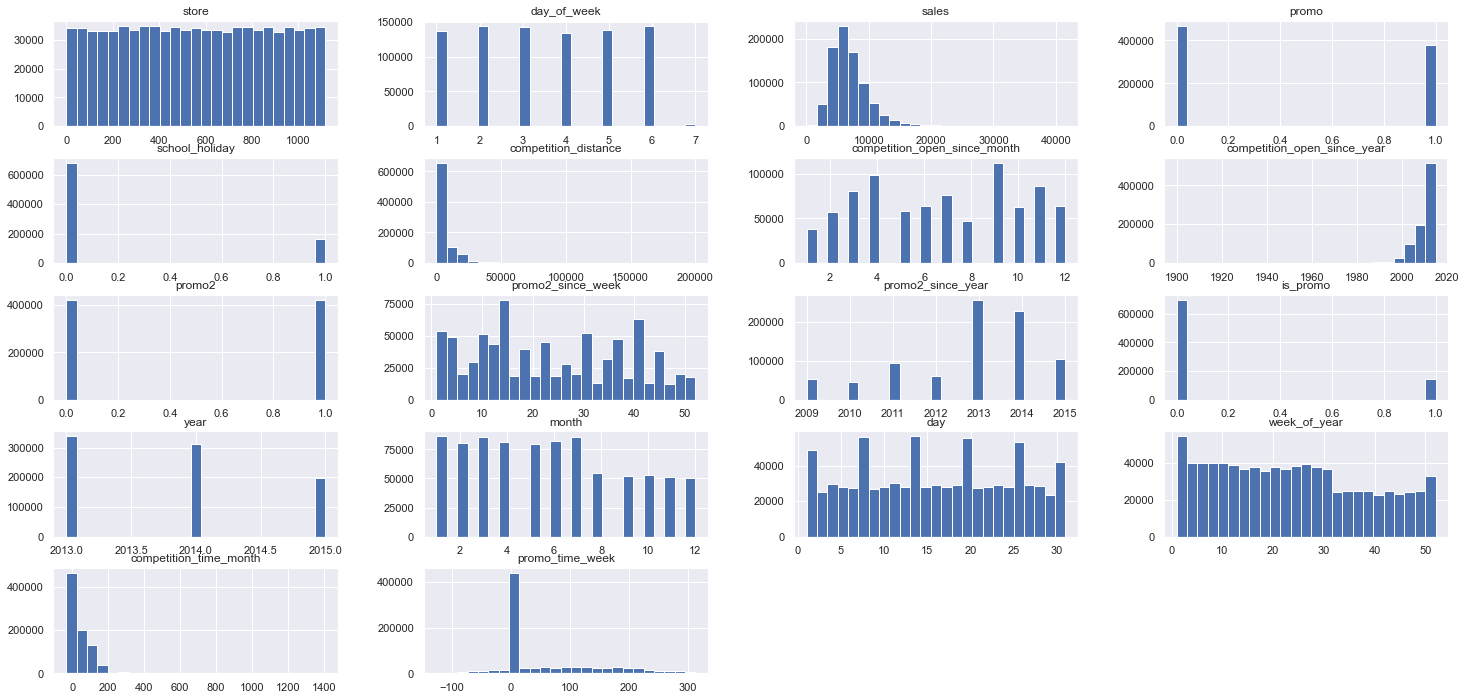

In [10]:
num_attribures.hist(bins=25);

### Categorical Variable

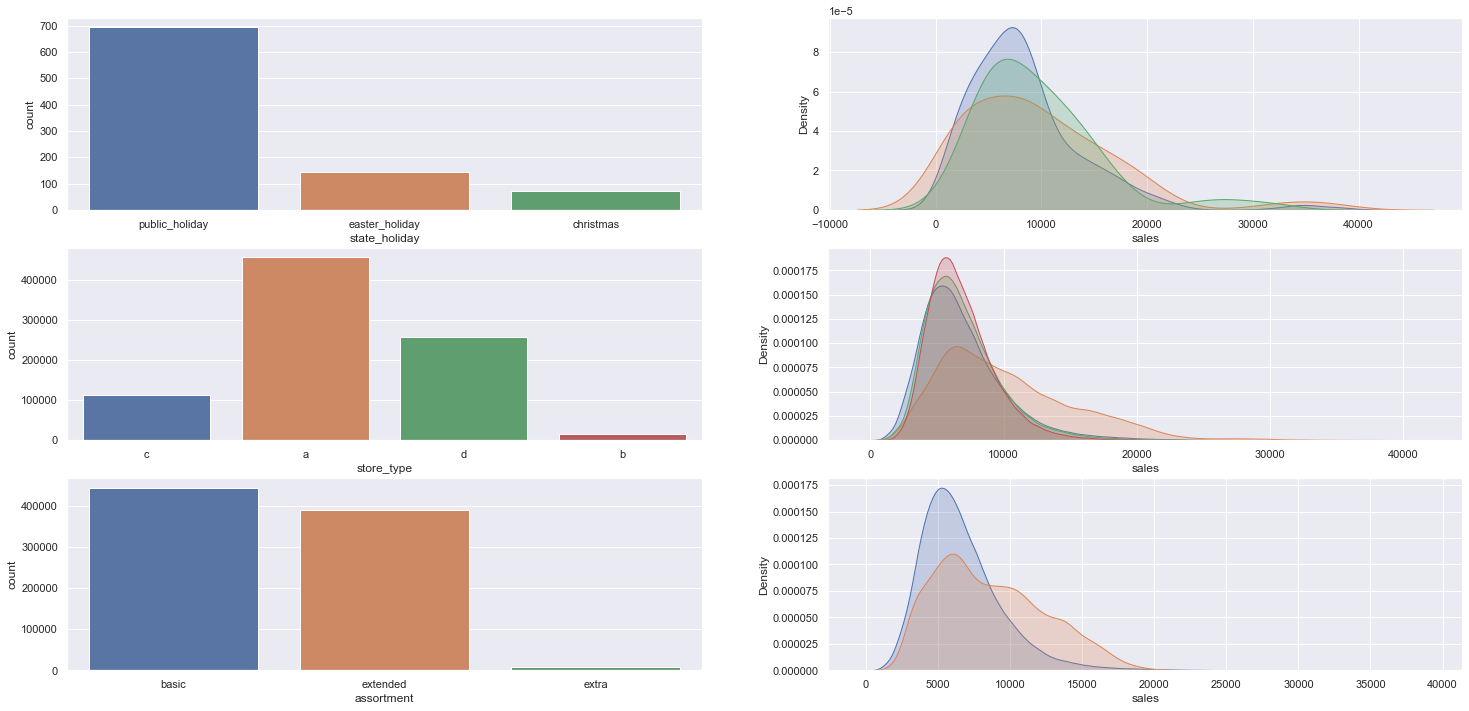

In [11]:
plt.subplot(3,2,1)
aux = df4[df4['state_holiday']!='regular_day']
sns.countplot(x='state_holiday',data=aux);

plt.subplot(3,2,2)
aux =df4[df4['state_holiday']=='public_holiday']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['state_holiday']=='easter_holiday']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['state_holiday']=='christmas']['sales']
sns.kdeplot(aux,shade=True)


plt.subplot(3,2,3)
sns.countplot(x='store_type',data=df4);

plt.subplot(3,2,4)
aux =df4[df4['store_type']=='a']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['store_type']=='b']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['store_type']=='c']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['store_type']=='d']['sales']
sns.kdeplot(aux,shade=True)

plt.subplot(3,2,5)
sns.countplot(x='assortment',data=df4);

plt.subplot(3,2,6)
aux =df4[df4['assortment']=='basic']['sales']
sns.kdeplot(aux,shade=True,label='basic')
aux =df4[df4['assortment']=='extra']['sales']
sns.kdeplot(aux,shade=True)
aux =df4[df4['assortment']=='extended']['sales']

## Bivariate analysis

**h6: Lojas com maior sortmento deveriam vender mais**

<AxesSubplot:xlabel='year_week'>

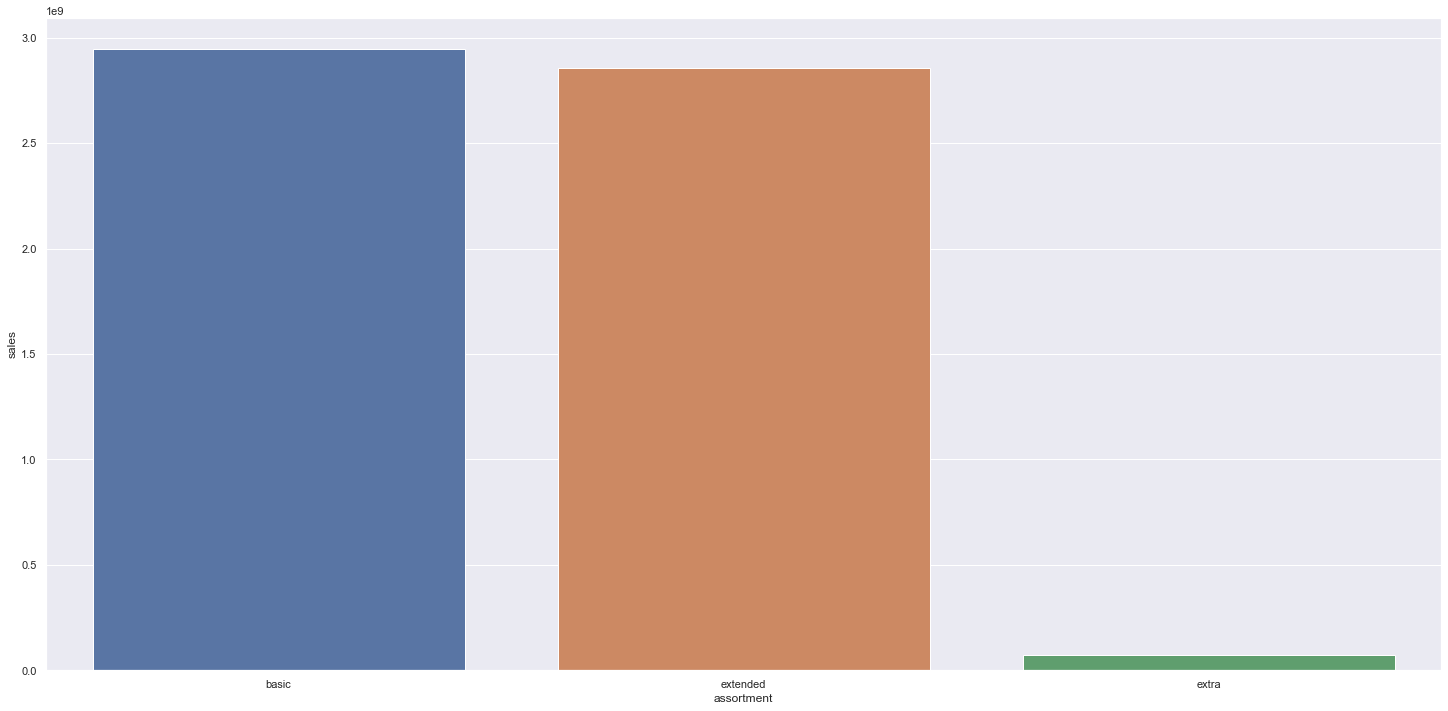

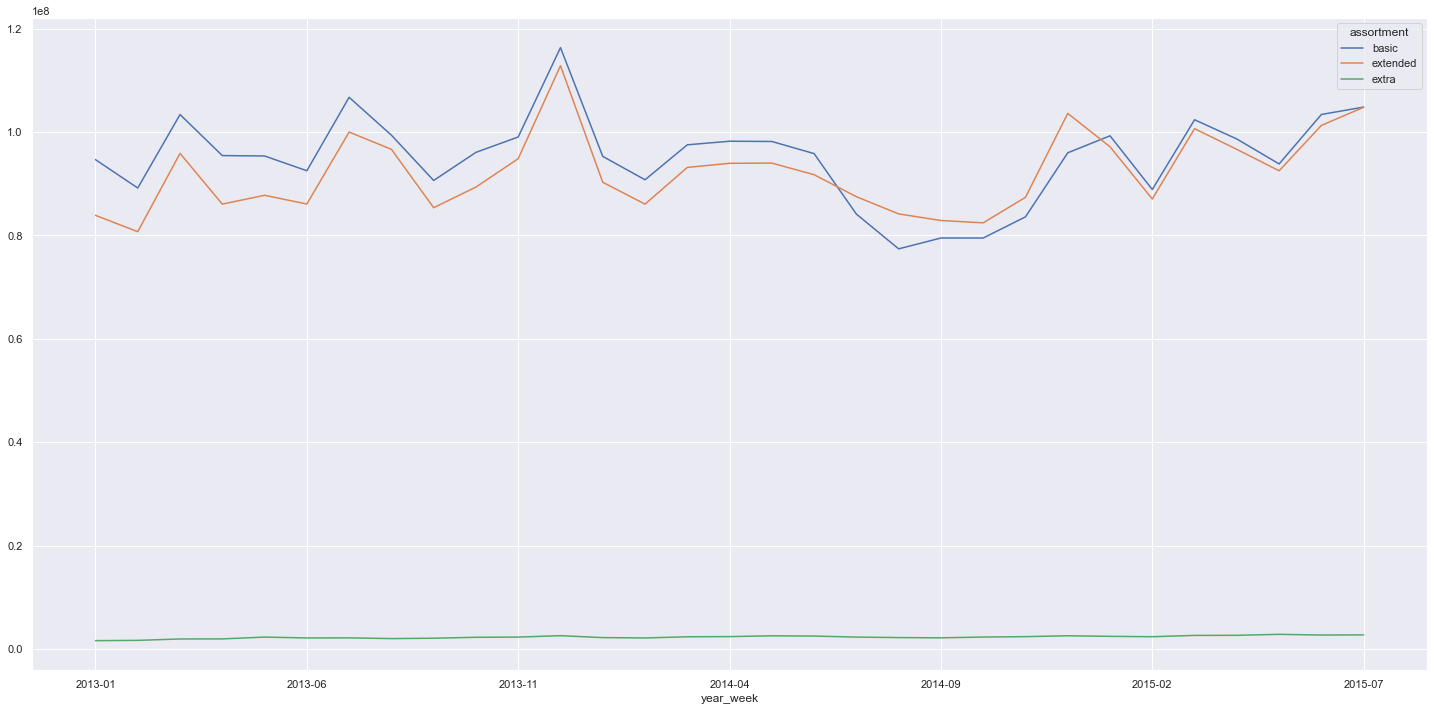

In [12]:
h1 = df4[['assortment','sales']].groupby('assortment').sum().reset_index()
sns.barplot(x='assortment',y='sales',data=h1);

h1_b = df4[['year_week','assortment','sales']].groupby(['year_week','assortment']).sum().reset_index()
h1_b.pivot(index='year_week',columns='assortment',values='sales').plot()

<AxesSubplot:>

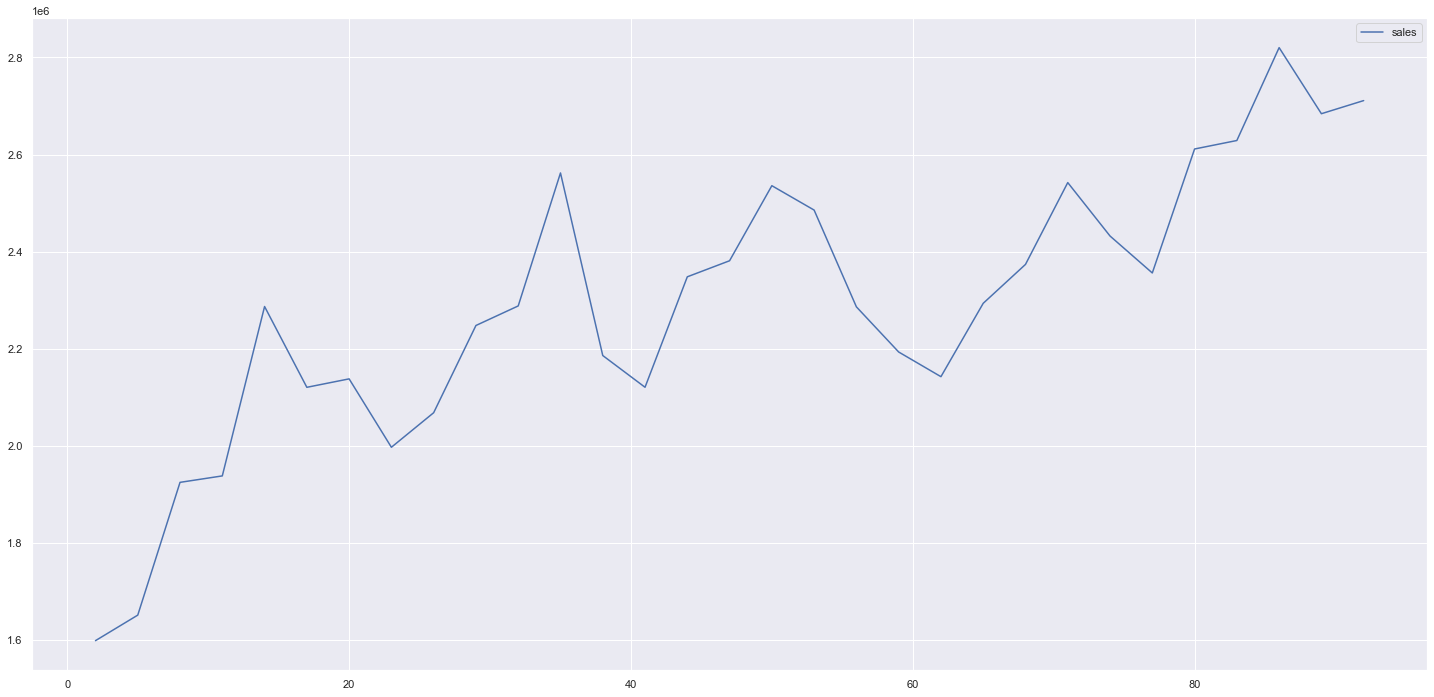

In [13]:
h1_b[h1_b['assortment']=='extra'].plot()

In [14]:
df4['assortment'].value_counts(normalize=True)

basic       0.526892
extended    0.463386
extra       0.009722
Name: assortment, dtype: float64

Falso, lojas com maior sortmento não vendem mais, mas tem que se levar em consideração que lojas com assortment extra só representam por volta de 0.01 % das lojas.

**h2: Lojas com competidores mais distantes deveriam vender mais**

<AxesSubplot:>

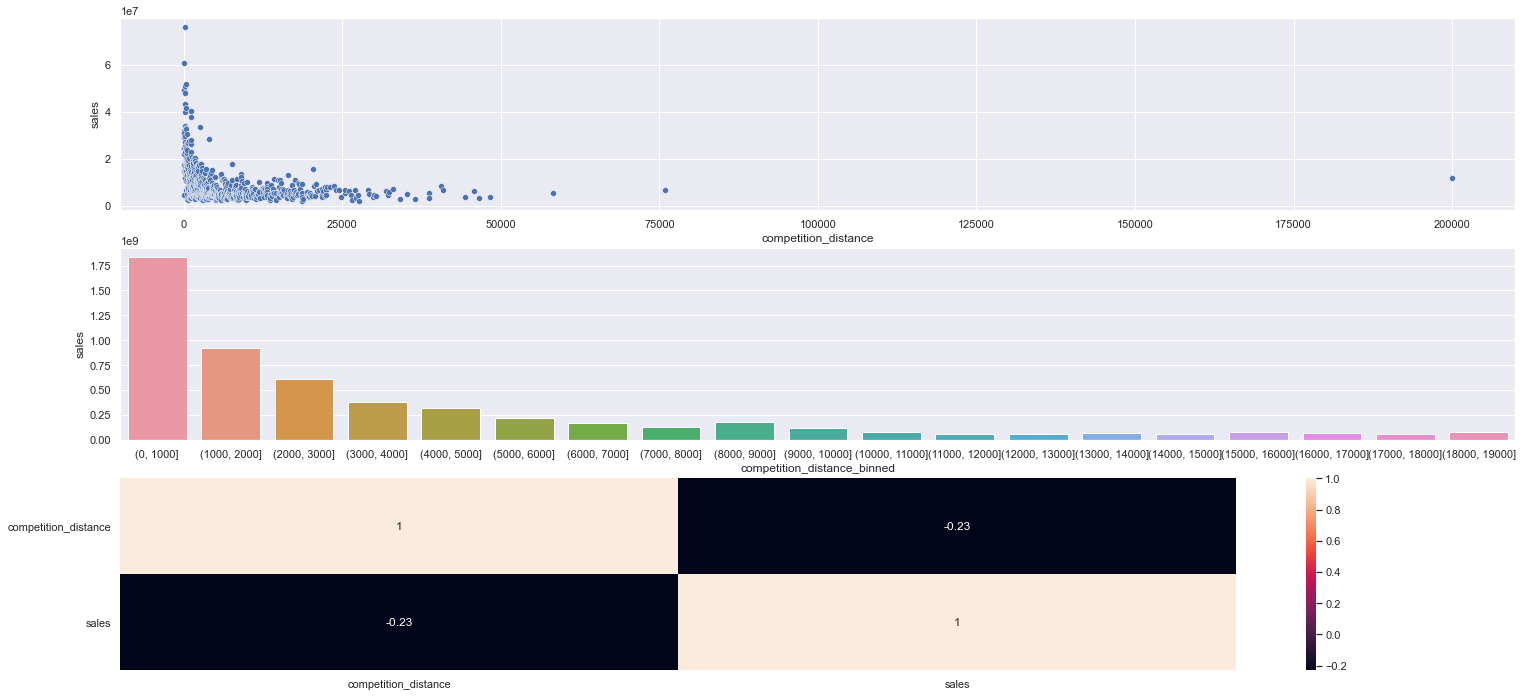

In [15]:
h2 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()
bins = list(np.arange(0,20000,1000))
h2['competition_distance_binned'] = pd.cut(h2['competition_distance'],bins=bins)
plt.subplot(3,1,1)
sns.scatterplot(x='competition_distance',y='sales',data=h2);
plt.subplot(3,1,2)
h2_b = h2[['competition_distance_binned','sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x='competition_distance_binned',y='sales',data=h2_b);
plt.subplot(3,1,3)
sns.heatmap(h2.corr(method='pearson'),annot=True)

Lojas com competidores mais distantes vendem menos

**h3: lojas com competidores a mais tempo deveriam vender mais**

<AxesSubplot:>

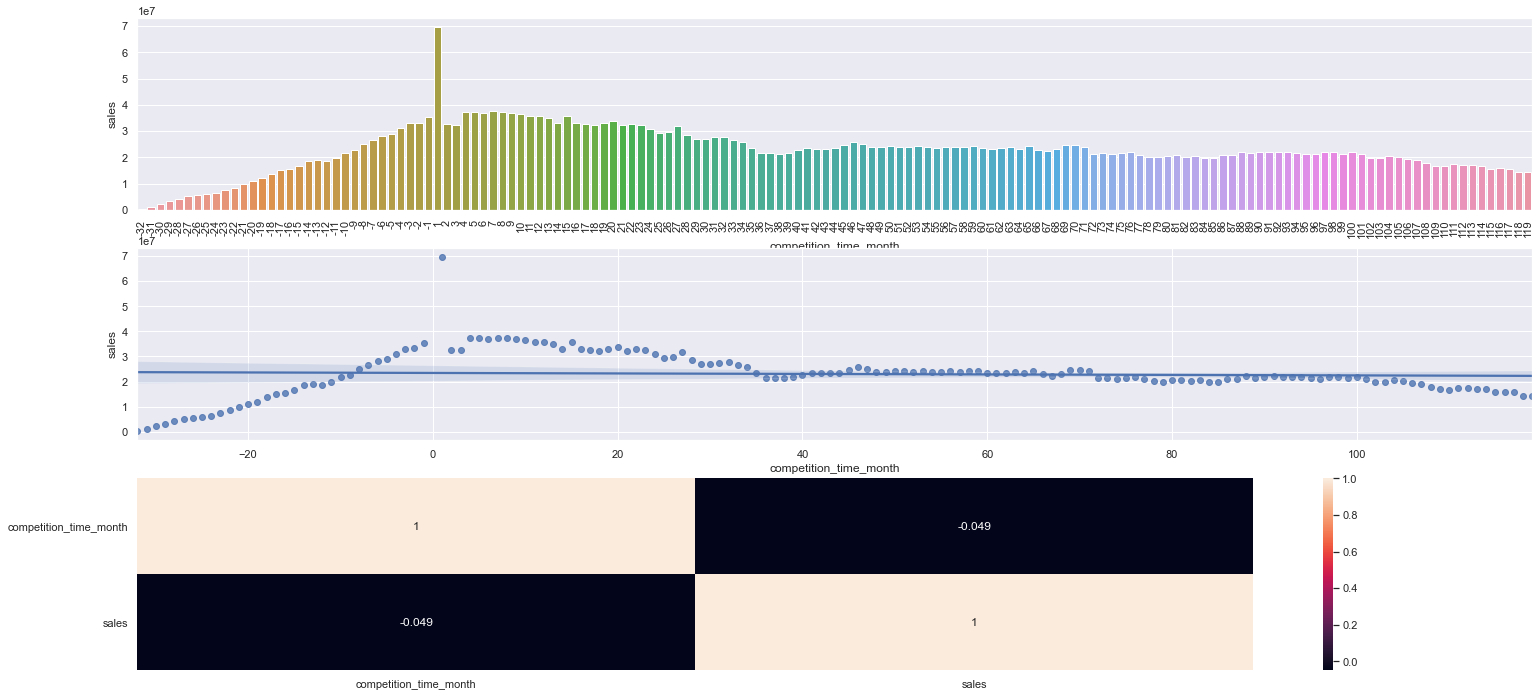

In [16]:
h3 = df4[['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
h3 = h3[(h3['competition_time_month'] < 120)&(h3['competition_time_month']!=0)]
plt.subplot(3,1,1)
sns.barplot(x='competition_time_month',y='sales',data=h3)
plt.xticks(rotation=90);
plt.subplot(3,1,2)
sns.regplot(x='competition_time_month',y='sales',data=h3)
plt.subplot(3,1,3)
sns.heatmap(h3.corr(method='pearson'),annot=True)

Falsa, lojas com competidores a mais tempo vendem menos

**h4 Lojas com maior porte deveriam vender mais**

<AxesSubplot:xlabel='store_type', ylabel='sales'>

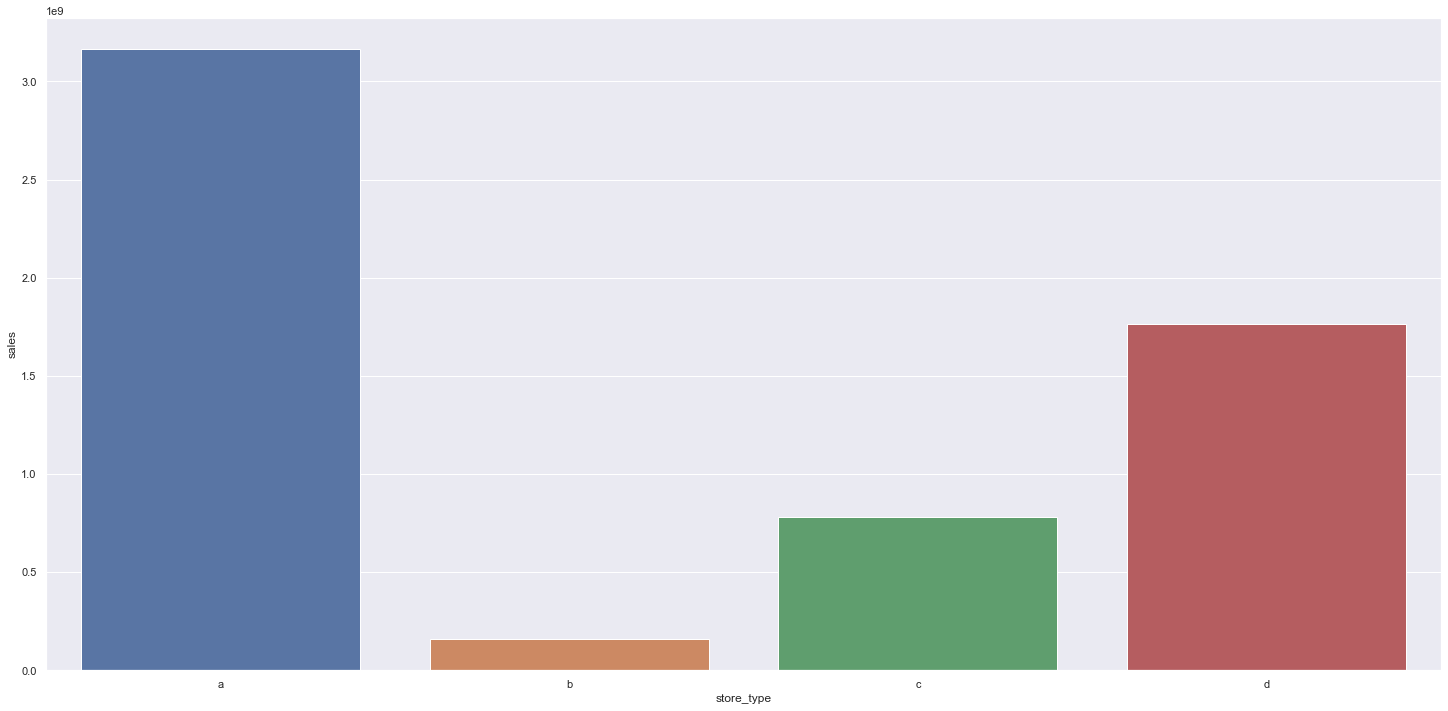

In [17]:
h4 = df4[['store_type','sales']].groupby('store_type').sum().reset_index()
sns.barplot(x='store_type',y='sales',data=h4)

<AxesSubplot:xlabel='year_week'>

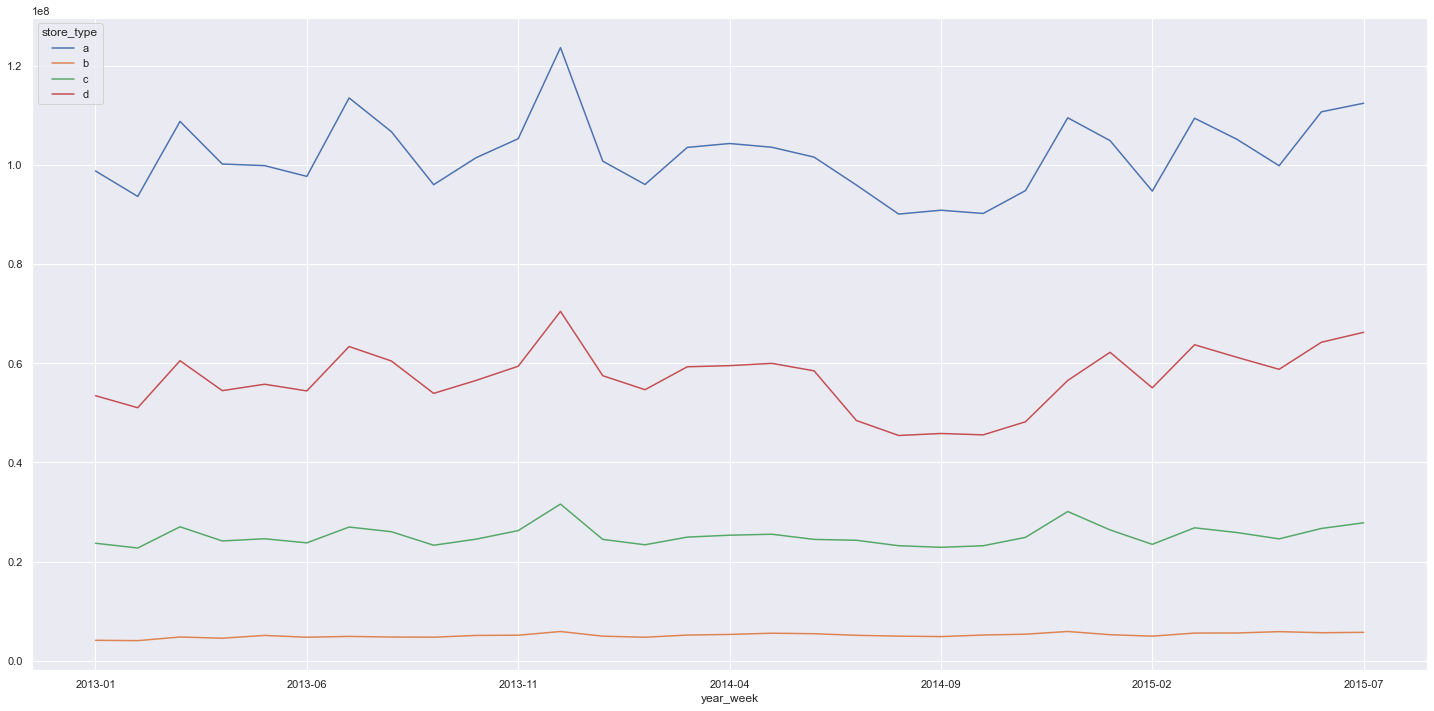

In [18]:
h4_b = df4[['year_week','store_type','sales']].groupby(['year_week','store_type']).sum().reset_index()
h4_b.pivot(index='year_week',columns='store_type',values='sales').plot()

In [19]:
df4['store_type'].value_counts(normalize=True)

a    0.541302
d    0.306474
c    0.133795
b    0.018429
Name: store_type, dtype: float64

Falso, Lojas com maior porte não necessáriamente vendem mais

**h5 Lojas com promoções por mais tempo deveriam vender mais**

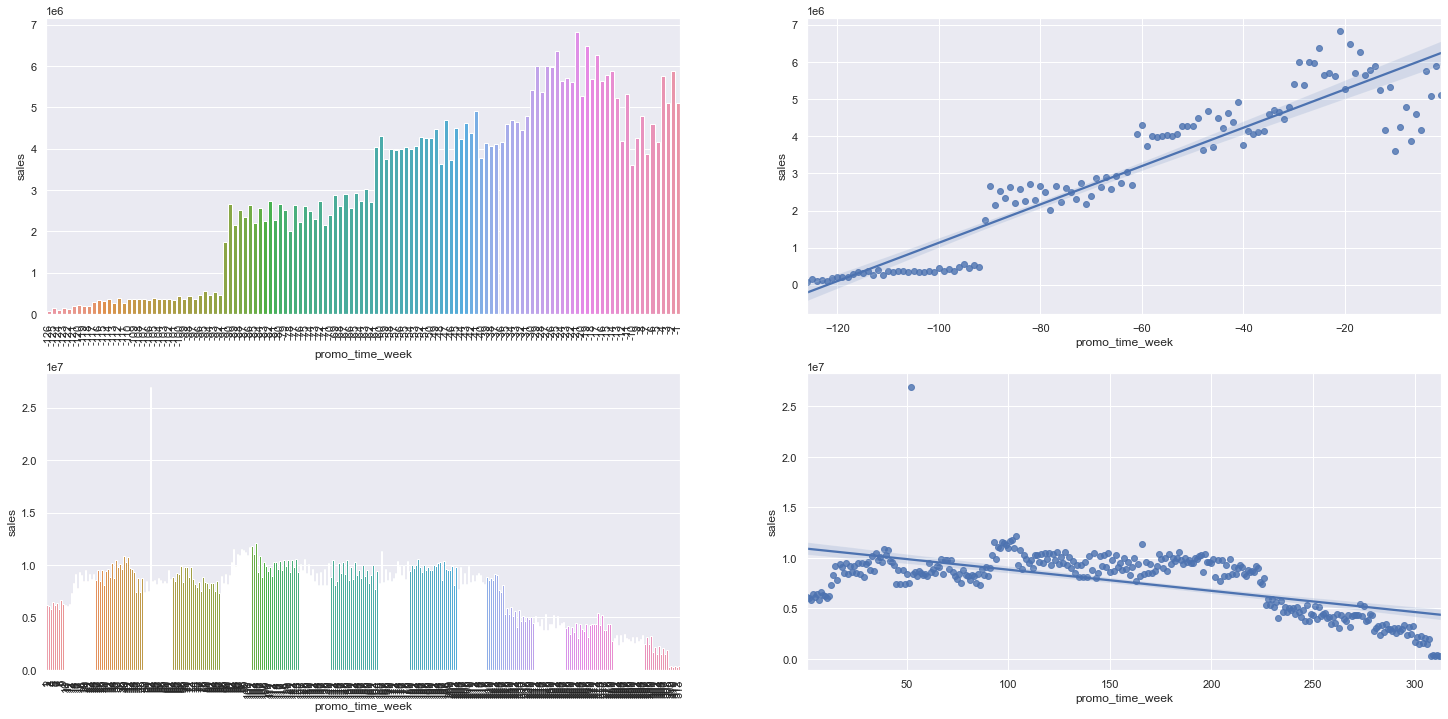

In [20]:
h5 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()
plt.subplot(2,2,1)
sns.barplot(x='promo_time_week',y='sales',data=h5[h5['promo_time_week']<0]);
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.regplot(x='promo_time_week',y='sales',data=h5[h5['promo_time_week']<0]);

plt.subplot(2,2,3)
sns.barplot(x='promo_time_week',y='sales',data=h5[h5['promo_time_week']>0]);
plt.xticks(rotation=90);
plt.subplot(2,2,4)
sns.regplot(x='promo_time_week',y='sales',data=h5[h5['promo_time_week']>0]);

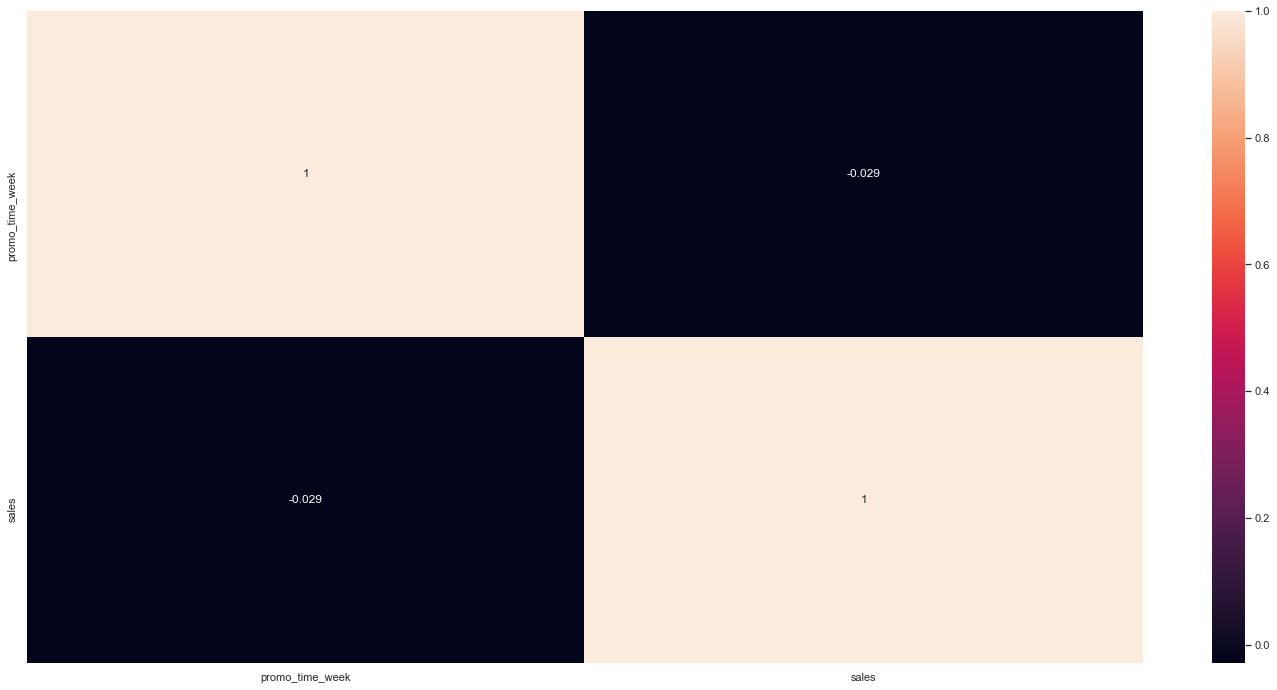

In [21]:
sns.heatmap(h5.corr(method='pearson'),annot=True);

Falso, lojas com um certo periodo de venda, vendem menos após um certo periodo de promoção

**h6: Lojas com mais promoções deveriam vender mais**

In [22]:
h6 = df4[['promo','promo2','sales']].groupby(['promo','promo2']).sum().reset_index()
h6

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


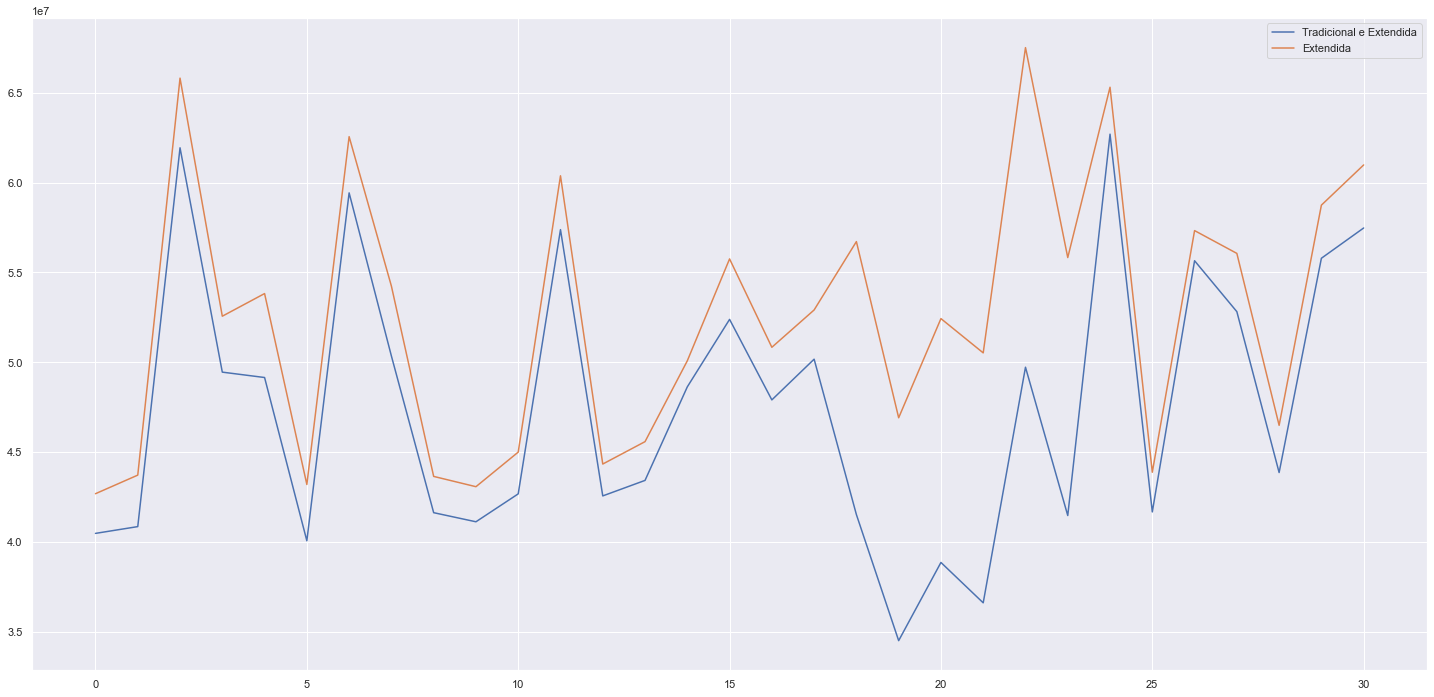

In [23]:
h6_b = df4[(df4['promo']==1)&(df4['promo2']==1)][['year_week','sales']].groupby('year_week').sum().reset_index()
ax = h6_b.plot()

h6_c = df4[(df4['promo']==1)&(df4['promo2']==0)][['year_week','sales']].groupby('year_week').sum().reset_index()
h6_c.plot(ax=ax)
ax.legend(labels=['Tradicional e Extendida','Extendida']);

Falsa, lojas com mias promoções consecutivas, vendem menos

**h7: Lojas abertas durante o natal deveriam vender mais**


<AxesSubplot:xlabel='year', ylabel='sales'>

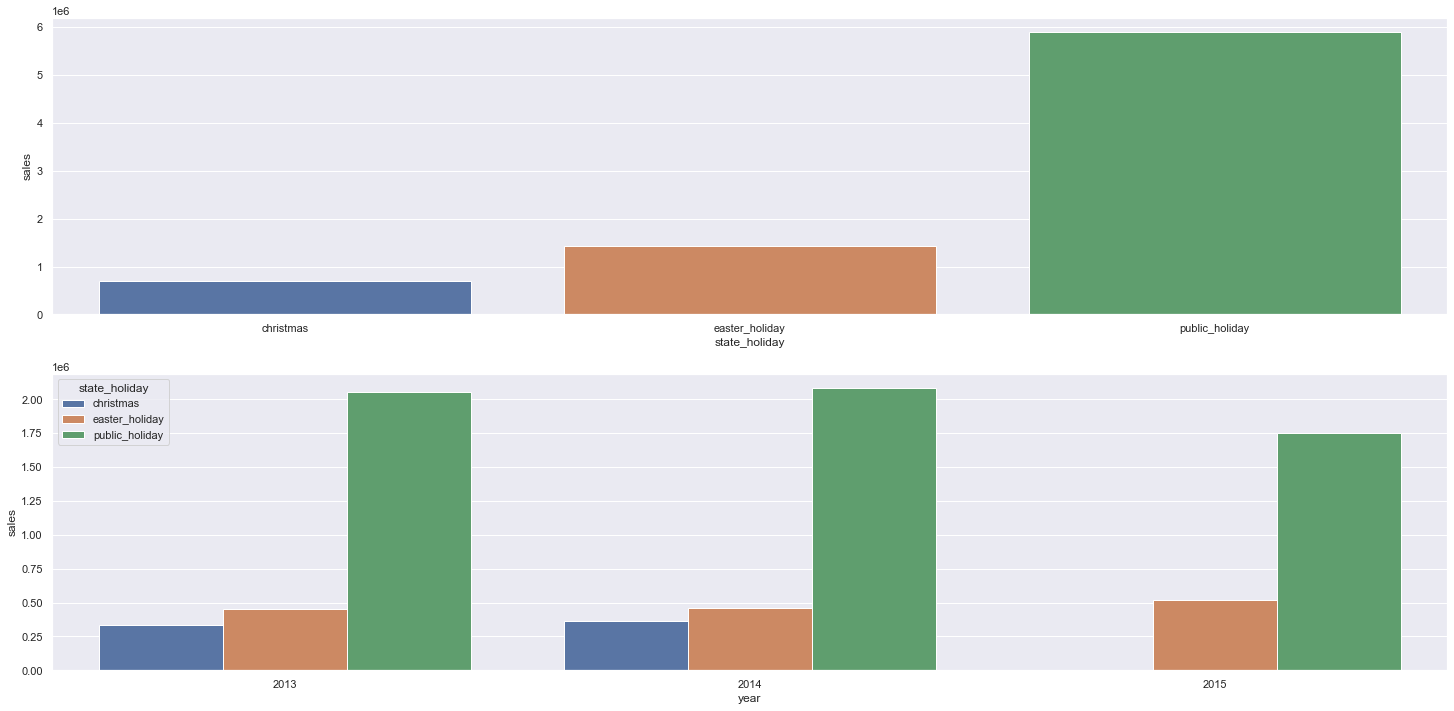

In [24]:
h7 = df4[df4['state_holiday']!='regular_day'][['state_holiday','sales']].groupby('state_holiday').sum().reset_index()
plt.subplot(2,1,1)
sns.barplot(x='state_holiday',y='sales',data=h7)
plt.subplot(2,1,2)
h7_b = df4[df4['state_holiday']!='regular_day'][['year','state_holiday','sales']].groupby(['year','state_holiday']).sum().reset_index()
sns.barplot(x='year',y='sales',hue='state_holiday',data=h7_b)

Falso, Lojas não vendem mais durante o natal

**h8: Lojas deveriam vender mais ao longo dos anos**

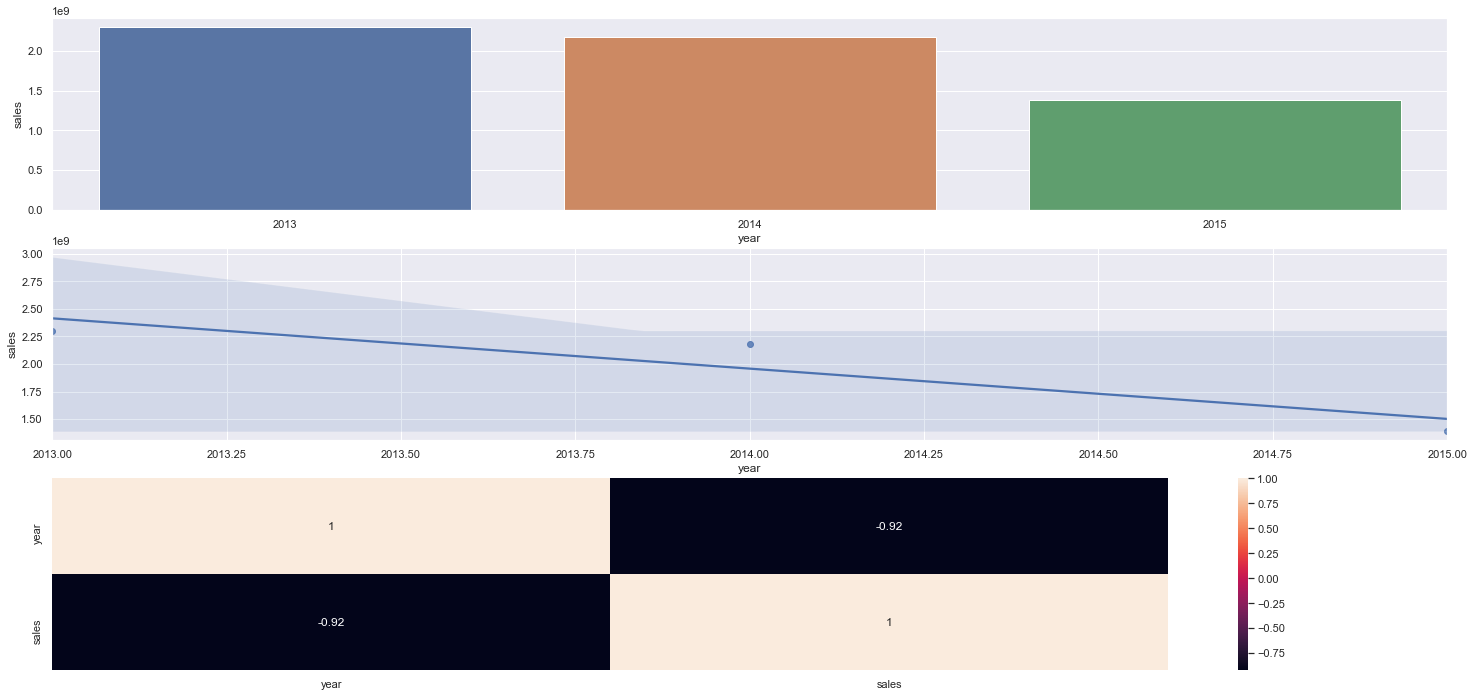

In [25]:
h8 = df4[['year','sales']].groupby('year').sum().reset_index()
plt.subplot(3,1,1)
sns.barplot(x='year',y='sales',data=h8)
plt.subplot(3,1,2)
sns.regplot(x='year',y='sales',data=h8)
plt.subplot(3,1,3)
sns.heatmap(h8.corr(method='pearson'),annot=True);


Falso, lojas estão vendendo menos ao longo dos anos

**h9:lojas que abrem nos primeiros 6 meses deveriam vender mais**

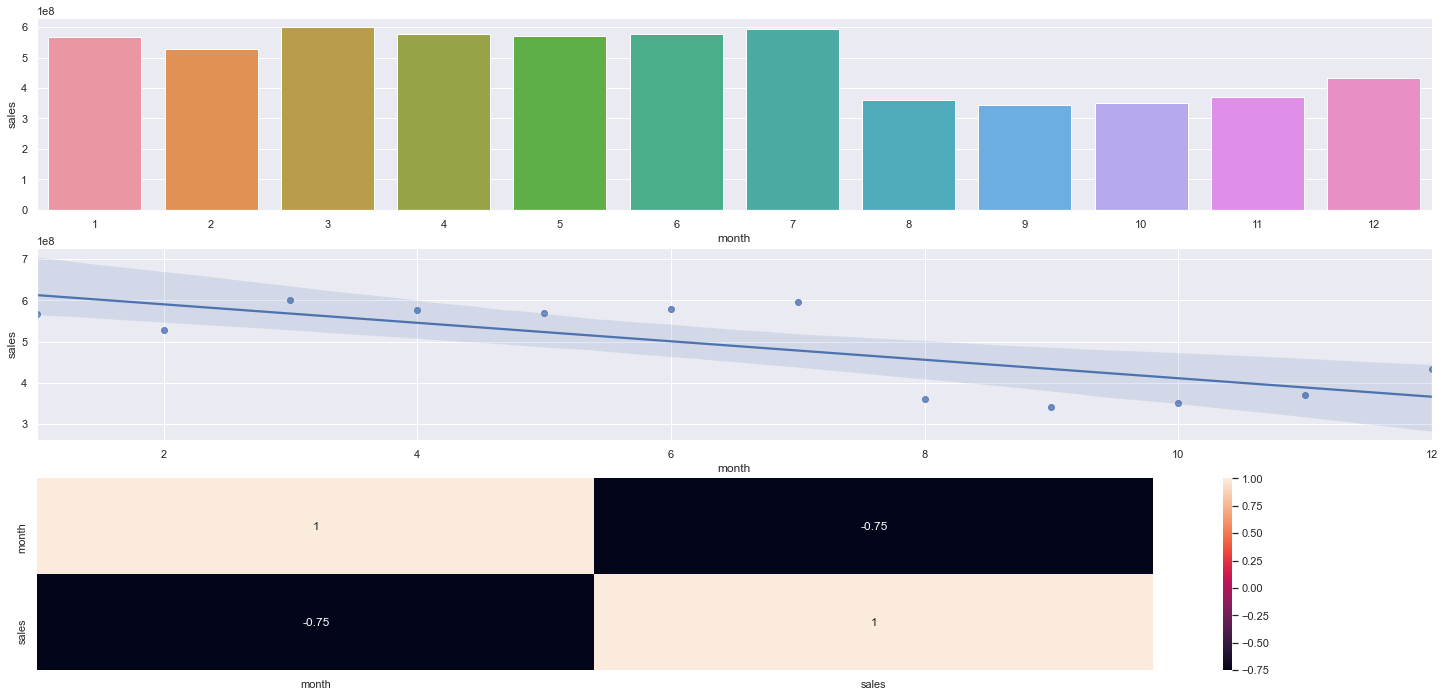

In [26]:
h9 = df4[['month','sales']].groupby('month').sum().reset_index()
plt.subplot(3,1,1)
sns.barplot(x='month',y='sales',data=h9)
plt.subplot(3,1,2)
sns.regplot(x='month',y='sales',data=h9)
plt.subplot(3,1,3)
sns.heatmap(h9.corr(method='pearson'),annot=True);


Verdadeiro, lojas no primeiro semestre vendem mais

**h10: Lojas deveriam vender mais depois do dia 10 de cada mês**

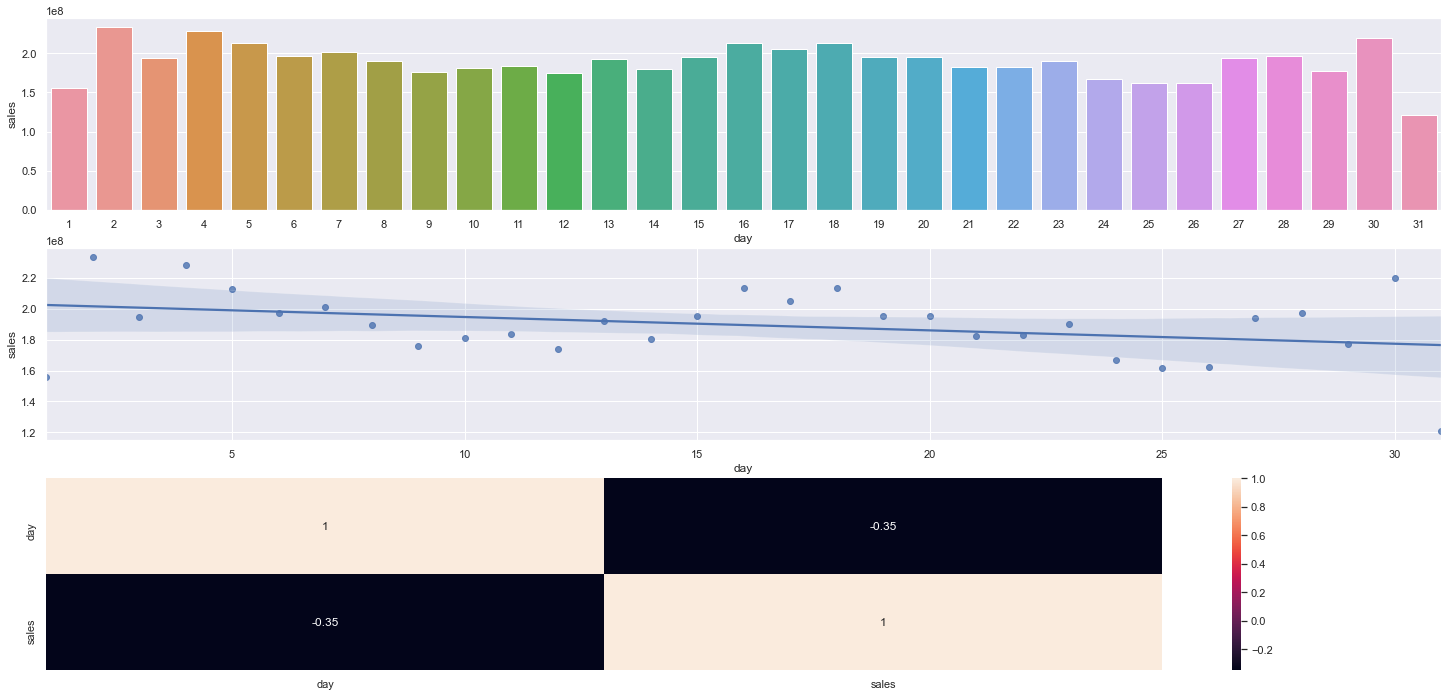

In [27]:
h10 = df4[['day','sales']].groupby('day').sum().reset_index()
plt.subplot(3,1,1)
sns.barplot(x='day',y='sales',data=h10)
plt.subplot(3,1,2)
sns.regplot(x='day',y='sales',data=h10)
plt.subplot(3,1,3)
sns.heatmap(h10.corr(method='pearson'),annot=True);


Verdadeiro, lojas vendem mais depois do dia 10

**h11: lojas que abrem nos finais de semanas deveriam veender mais**

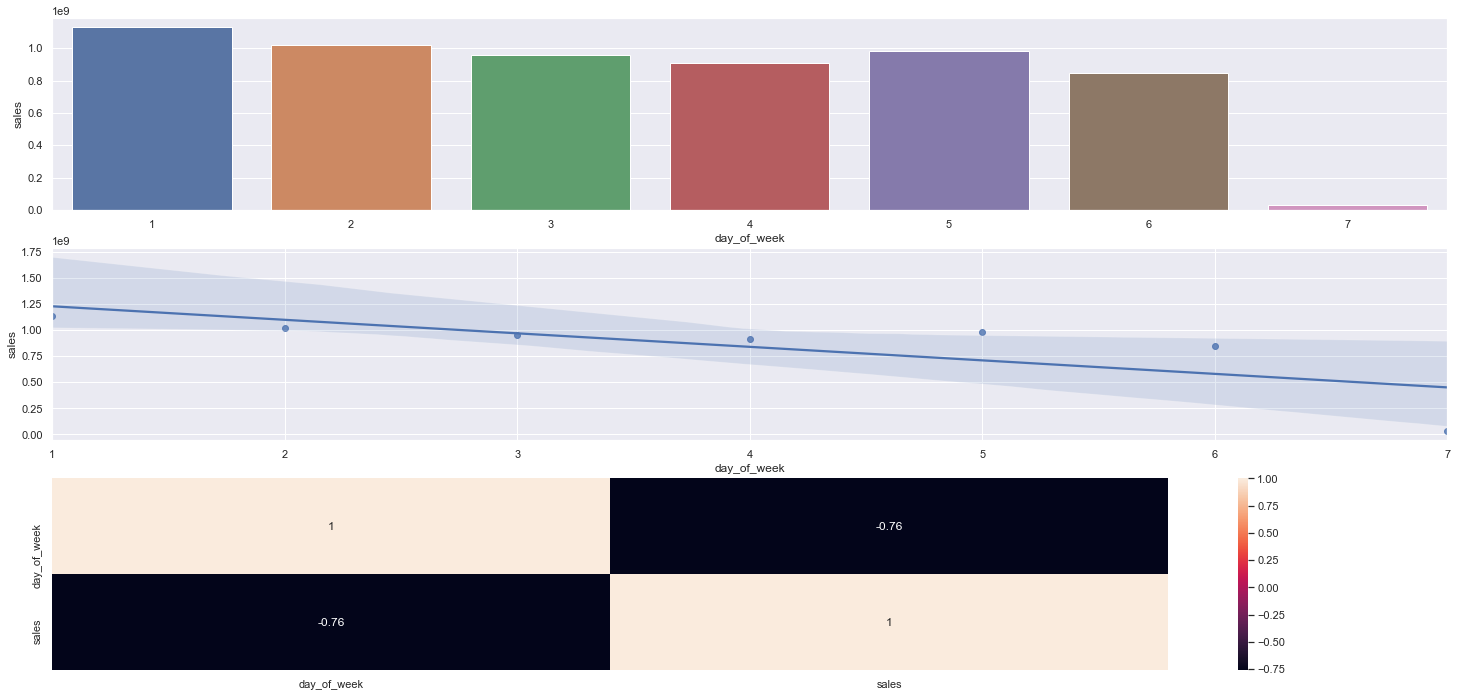

In [28]:
h11 = df4[['day_of_week','sales']].groupby('day_of_week').sum().reset_index()
plt.subplot(3,1,1)
sns.barplot(x='day_of_week',y='sales',data=h11)
plt.subplot(3,1,2)
sns.regplot(x='day_of_week',y='sales',data=h11)
plt.subplot(3,1,3)
sns.heatmap(h11.corr(method='pearson'),annot=True);


Falso, lojas vendem menos nos fim de semanas

**h12: lojas vendem mais no inverno**

<AxesSubplot:xlabel='year', ylabel='sales'>

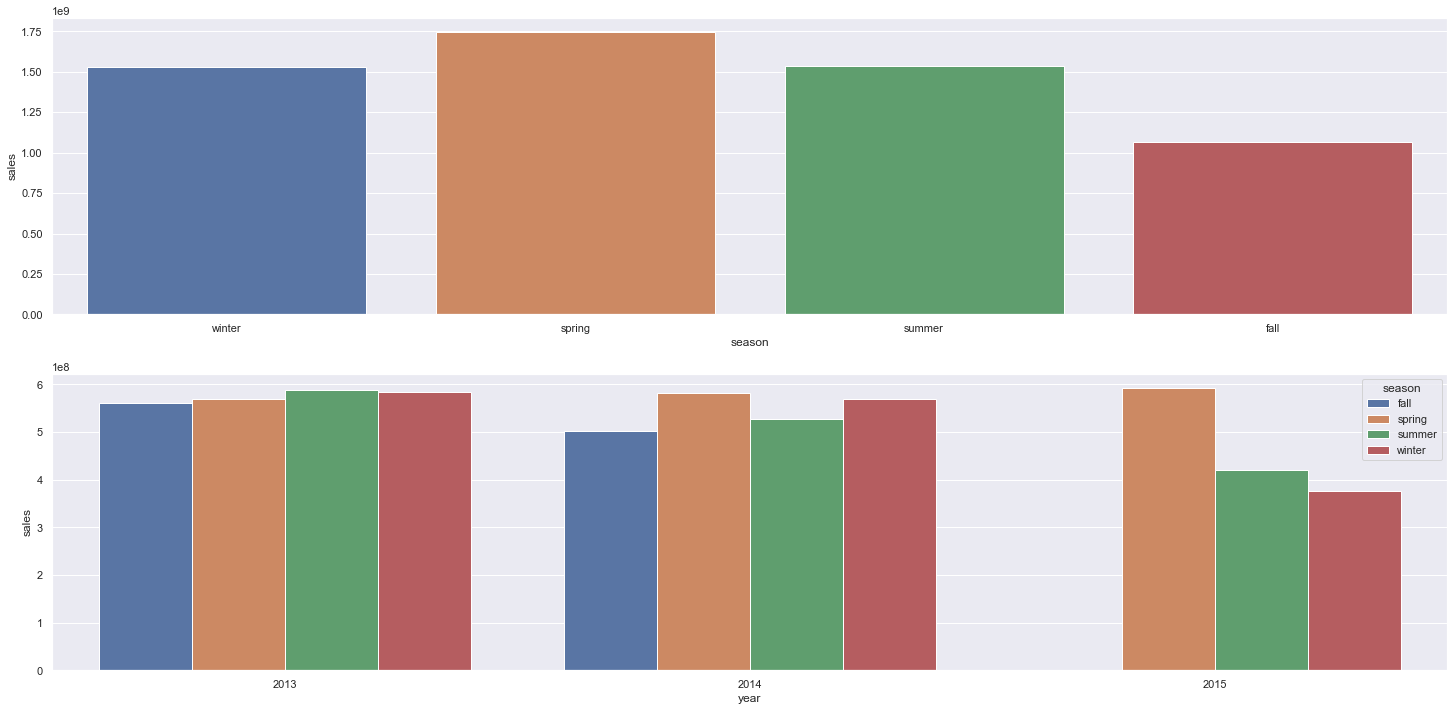

In [29]:
h12 = df4[['season','sales']].groupby('season').sum().reset_index()
plt.subplot(2,1,1)
sns.barplot(x='season',y='sales',data=h12,order=['winter','spring','summer','fall'])
plt.subplot(2,1,2)
h12_b = df4[['year','season','sales']].groupby(['year','season']).sum().reset_index()
sns.barplot(x='year',hue='season',y='sales',data=h12_b)

Falso, lojas vendem mais na primavera
obs: como o dataset só vai até 2015-07, fall tem uma queda de vendas pelo desbalanceamento

**h13: Lojas vendem menos durante os feriados escolares**

<AxesSubplot:xlabel='month', ylabel='sales'>

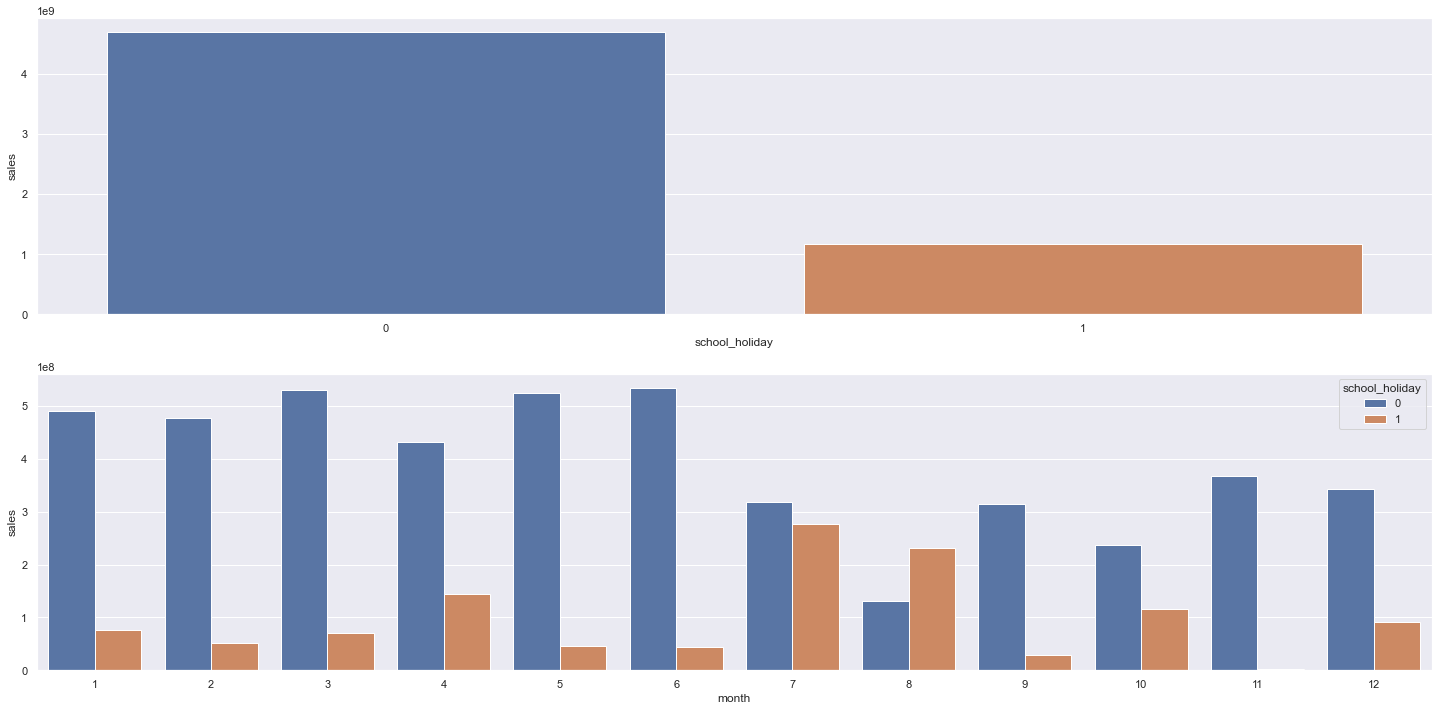

In [30]:
h13 = df4[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()
plt.subplot(2,1,1)
sns.barplot(x='school_holiday',y='sales',data=h13)
plt.subplot(2,1,2)
h13_b = df4[['month','school_holiday','sales']].groupby(['month','school_holiday']).sum().reset_index()
sns.barplot(x='month',y='sales',hue='school_holiday',data=h13_b)

Verdadeiro, lojas vendem menos durante os feriados escolares

## Multivariate analysis

### Numerical variables

<AxesSubplot:>

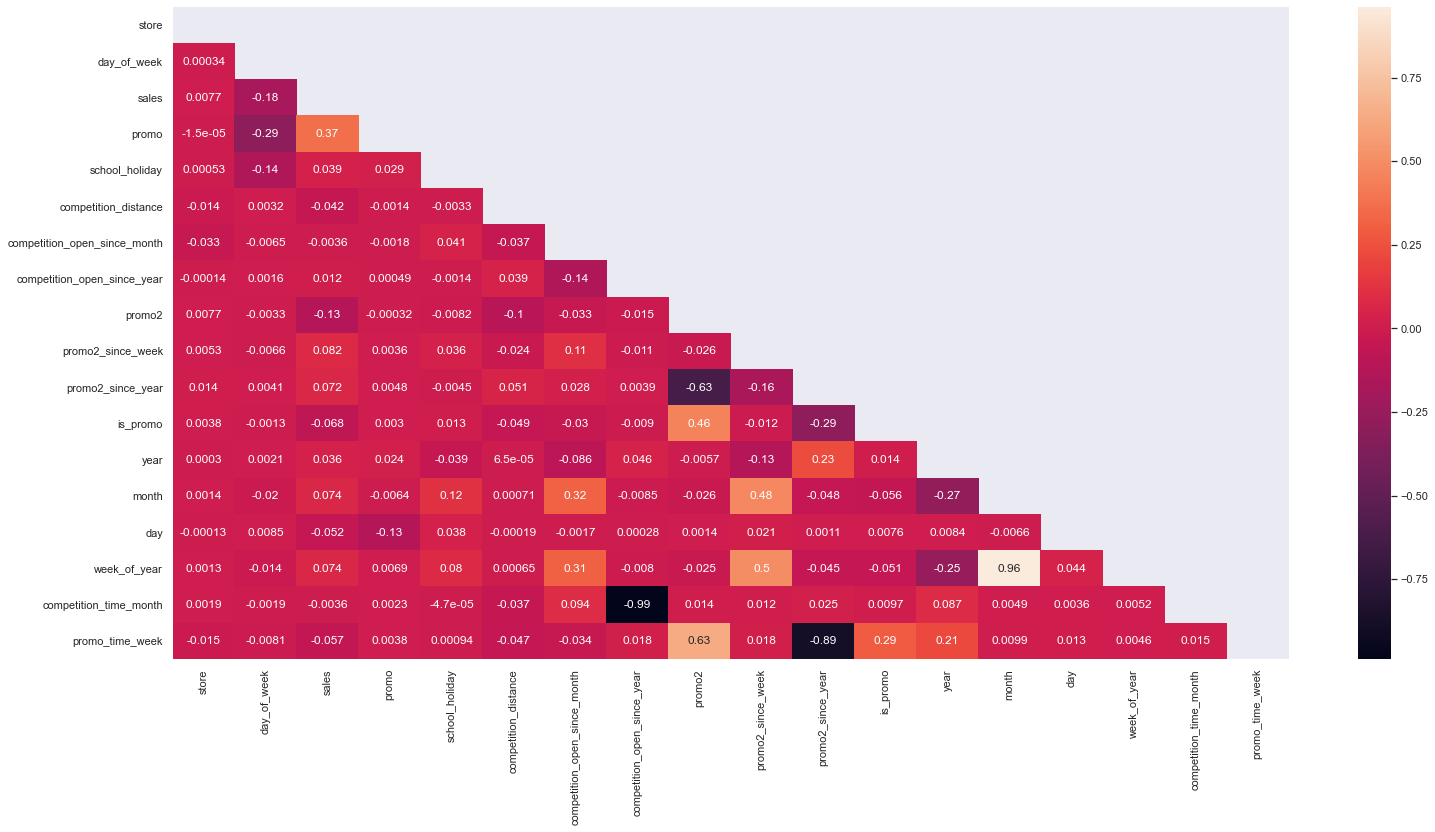

In [34]:
coorelation = num_attribures.corr(method='pearson')
matrix = np.triu(coorelation)
sns.heatmap(coorelation,annot=True,mask=matrix)

### Categorical Variable

<AxesSubplot:>

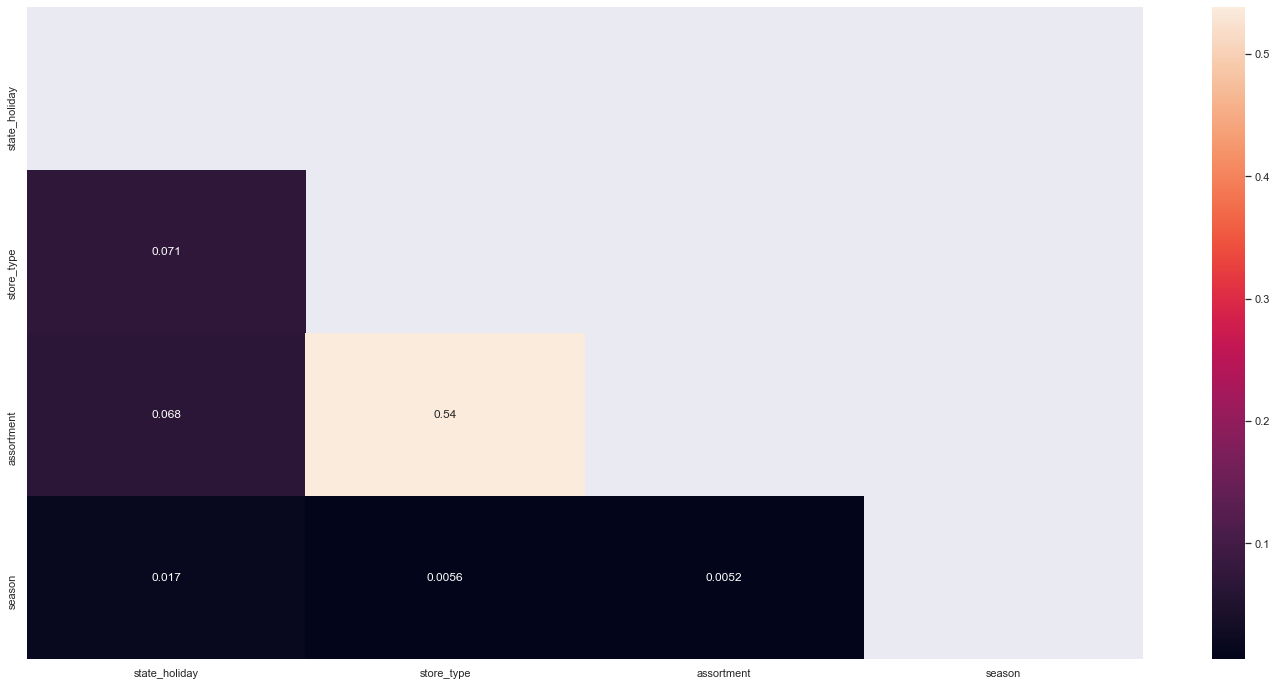

In [42]:
cat = df4.select_dtypes(include=['object'])


cat_list = ['state_holiday', 'store_type', 'assortment','season']
cat_dic = {}


for c1 in cat_list:
    for c2 in cat_list:
        v = cramer_v(cat[c1], cat[c2])

        if cat_list.index(c2) == 0:
            cat_dic[c1] = []
            cat_dic[c1].append(v)

        else:
            cat_dic[c1].append(v)


cramer_v_table = pd.DataFrame(cat_dic)
cramer_v_table.set_index(cramer_v_table.columns, inplace=True)

matrix = np.triu(cramer_v_table)
sns.heatmap(cramer_v_table, annot=True,mask=matrix)